<a href="https://colab.research.google.com/github/Kristina-Boyarskaya/GU_Practic_3567/blob/main/10lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задача №63. Решение в группах
1. Изобразите отношение households к population с
помощью точечного графика
2. Визуализировать longitude по отношения к
median_house_value, используя линейный график
3. Представить гистограмму по housing_median_age
4. Изобразить гистограмму по median_house_value с
оттенком housing_median_age


In [3]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')

In [4]:
import seaborn as sns

1.Изобразите отношение households к population с помощью точечного графика

<AxesSubplot:xlabel='households', ylabel='population'>

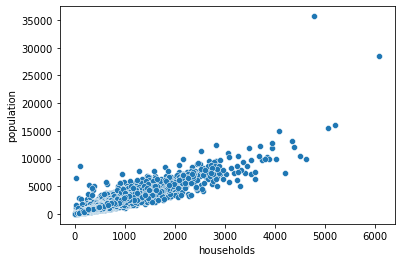

In [5]:
sns.scatterplot(data=df, x="households", y="population")


2. Визуализировать longitude по отношения к
median_house_value, используя линейный график

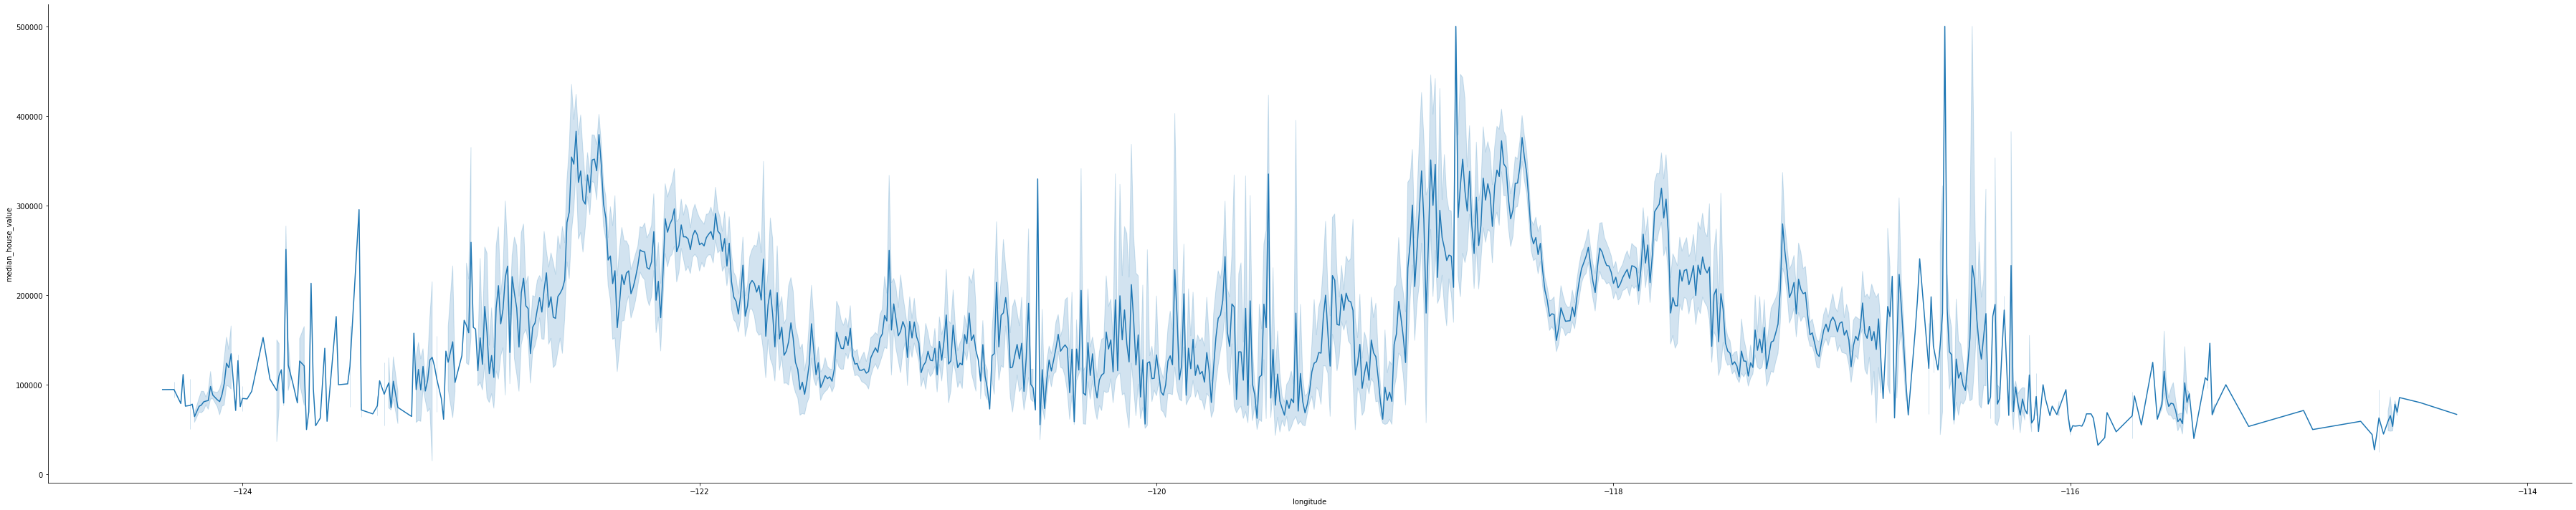

In [10]:
sns.relplot(x="longitude", y="median_house_value", kind="line", data=df, height = 10, aspect = 5)

3. Представить гистограмму по housing_median_age

<AxesSubplot:xlabel='housing_median_age', ylabel='Count'>

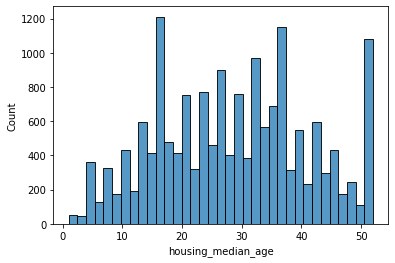

In [13]:
sns.histplot(data=df, x="housing_median_age")

4.Изобразить гистограмму по median_house_value с оттенком housing_median_age

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

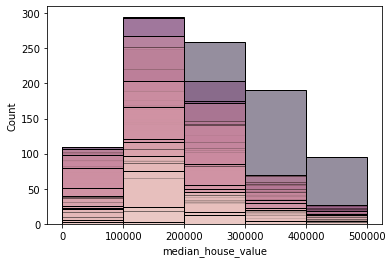

In [18]:
sns.histplot(data=df, x="median_house_value", hue="housing_median_age", legend=False, bins=range(0,500001,100000))

Задача №65. Решение в группах
Написать EDA для датасета про пингвинов
Необходимо:

● Использовать 2-3 точечных графика

● Применить доп измерение в точечных графиках, используя
аргументы hue, size, stile

● Использовать PairGrid с типом графика на ваш выбор

● Изобразить Heatmap

● Использовать 2-3 гистограммы


In [75]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [76]:
penguins.shape

(344, 7)

In [77]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

избавляемся от нулов и пропусков

In [58]:
penguins.dropna(inplace=True)

In [24]:
penguins.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [78]:
penguins.shape

(344, 7)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='body_mass_g'>

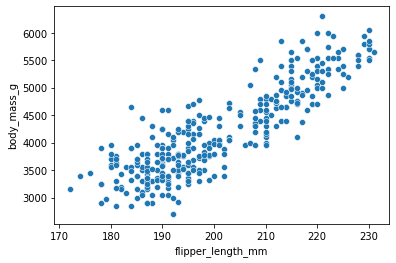

In [55]:
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g")

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

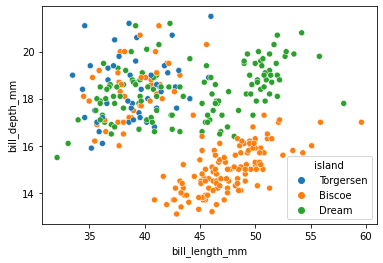

In [30]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="island")


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

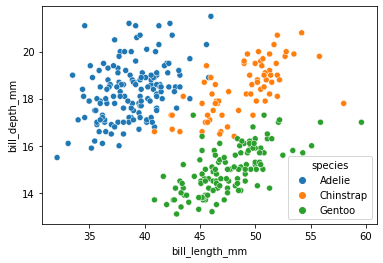

In [31]:
sns.scatterplot(data=penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

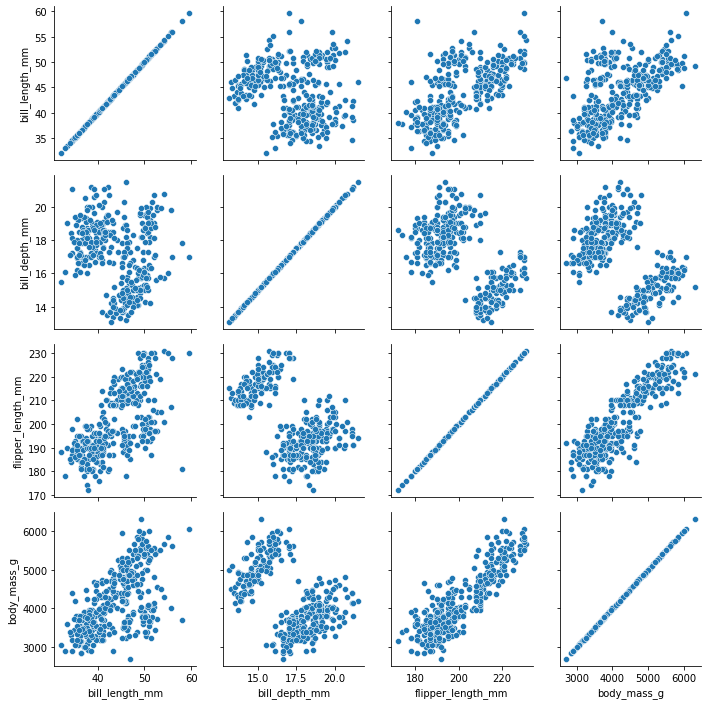

In [32]:
lst=['bill_length_mm', "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
g = sns.PairGrid(penguins[lst])
g.map(sns.scatterplot)

<AxesSubplot:>

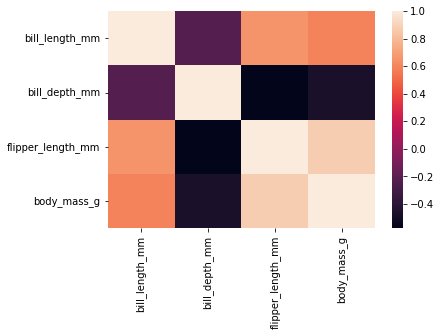

In [34]:
sns.heatmap(penguins.corr())

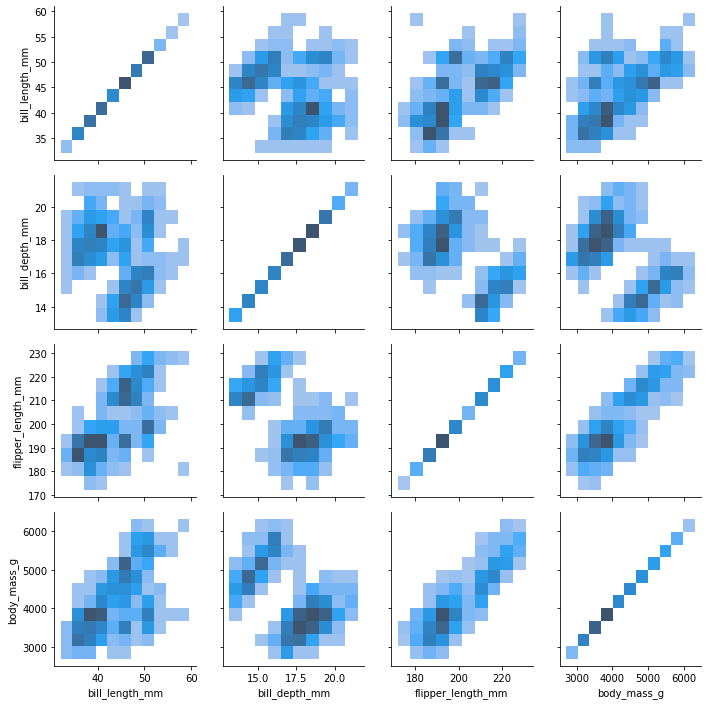

In [35]:
lst=['bill_length_mm', "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"]
g = sns.PairGrid(penguins[lst])
g.map(sns.histplot)

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

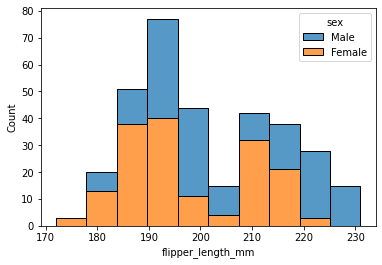

In [39]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="sex", multiple='stack')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

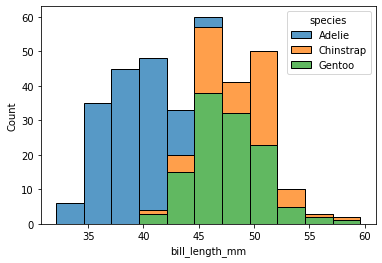

In [63]:
sns.histplot(data=penguins, x="bill_length_mm", hue="species", multiple="stack")

Задача №67. Решение в группах
1. Создать новый столбец в таблице с
пингвинами, который будет отвечать за
показатель длины клюва пингвина.
high - длинный(от 42)
middle - средний(от 35 до 42)
low - маленький(до 35)

In [83]:
penguins.loc[penguins['bill_length_mm'] >= 42, 'heigh_group'] = 'high'
penguins.loc[(penguins["bill_length_mm"] >= 35) & (penguins["bill_length_mm"] < 42), 'heigh_group'] = 'middle'
penguins.loc[penguins["bill_length_mm"] < 35, 'heigh_group'] = 'low'

In [84]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,heigh_group
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,middle
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,middle
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,middle
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,middle
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,high
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,high
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,high


Задача №69. Решение в группах
1. Изобразить гистограмму по flipper_length_mm
с оттенком height_group. Сделать анализ


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

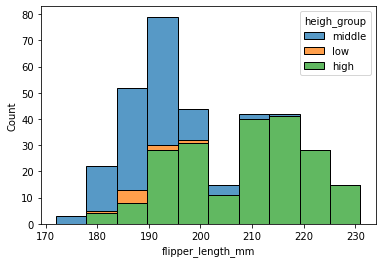

In [86]:
sns.histplot(data=penguins, x="flipper_length_mm", hue="heigh_group", multiple='stack')